In [1]:
import numpy as np
import pandas as pd

from tqdm.notebook import *

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import files

# Cette fonction ouvrira une fenêtre pour télécharger un fichier
uploaded = files.upload()


Saving Donnees_propres.csv to Donnees_propres.csv


In [3]:
df=pd.read_csv("Donnees_propres.csv")
display(df.head())
display(df.info())

,lib_mrq,lib_mod_doss,lib_mod,dscom,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,carburant,typ_boite,nb_rapp,etiquette
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.3,5.8,7.8,...,0.002,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.5,6.0,8.0,...,0.002,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),non,9,125.0,6.9,4.3,5.3,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          52308 non-null  object 
 1   lib_mod_doss     52308 non-null  object 
 2   lib_mod          52308 non-null  object 
 3   dscom            52308 non-null  object 
 4   hybride          52308 non-null  object 
 5   puiss_admin_98   52308 non-null  int64  
 6   puiss_max        52308 non-null  float64
 7   conso_urb        52308 non-null  float64
 8   conso_exurb      52308 non-null  float64
 9   conso_mixte      52308 non-null  float64
 10  co2              52308 non-null  float64
 11  co_typ_1         52308 non-null  float64
 12  nox              52308 non-null  float64
 13  ptcl             52308 non-null  float64
 14  masse_ordma_min  52308 non-null  int64  
 15  masse_ordma_max  52308 non-null  int64  
 16  champ_v9         52308 non-null  object 
 17  Carrosserie 

None

On supprime les colonnes qui contiennent des informations sur la marque ou le constructeur :
lib_mrq, lib_mod_doss, lib_mod_ dscom ainsi que la variable champ_v9, co2 (nous avons les etiquettes), puiss_admin_98, co_typ_1


In [4]:
to_drop = ['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'champ_v9', 'co2', 'puiss_admin_98', 'co_typ_1',
           'conso_urb', 'conso_exurb', 'conso_mixte']
df_clear = df.drop(to_drop, axis = 1)

In [5]:

# On récupère les colonnes de type Object
colonnes_object = df_clear.select_dtypes(include='object')

# On calcule le nombre de modalités de chacune de ces variables
categories_uniques = colonnes_object.nunique()
print(categories_uniques)

# 6 Variables catégorielles à réencoder

hybride         2
Carrosserie    11
gamme           6
carburant       4
typ_boite       3
etiquette       7
dtype: int64


Reencodage des variables categorielles

In [6]:
# Variable hybride

# On remplace les notes alphabétiques par les notes numériques correspondantes
df_clear['hybride'] = df_clear['hybride'].replace({'oui':1, 'non': 0})
display('hybride', df_clear['hybride'].unique())

# Variable cible etiquette
# On créé un dictionnaire qui contient les changements souhaités
grade = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# On remplace les notes alphabétiques par les notes numériques correspondantes
df_clear['etiquette'] = df_clear['etiquette'].replace(grade)
display('etiquette', df_clear['etiquette'].unique())

'hybride'

array([0, 1])

'etiquette'

array([4, 2, 3, 1, 0, 5, 6])

In [7]:
df_encoded = pd.get_dummies(df_clear, dtype='int')

In [8]:
df_encoded.info()
df_encoded.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hybride                          52308 non-null  int64  
 1   puiss_max                        52308 non-null  float64
 2   nox                              52308 non-null  float64
 3   ptcl                             52308 non-null  float64
 4   masse_ordma_min                  52308 non-null  int64  
 5   masse_ordma_max                  52308 non-null  int64  
 6   nb_rapp                          52308 non-null  int64  
 7   etiquette                        52308 non-null  int64  
 8   Carrosserie_BERLINE              52308 non-null  int64  
 9   Carrosserie_BREAK                52308 non-null  int64  
 10  Carrosserie_CABRIOLET            52308 non-null  int64  
 11  Carrosserie_COMBISPACE           52308 non-null  int64  
 12  Carrosserie_COMBIS

Index(['hybride', 'puiss_max', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'nb_rapp', 'etiquette', 'Carrosserie_BERLINE',
       'Carrosserie_BREAK', 'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE',
       'Carrosserie_COMBISPCACE', 'Carrosserie_COUPE', 'Carrosserie_MINIBUS',
       'Carrosserie_MINISPACE', 'Carrosserie_MONOSPACE',
       'Carrosserie_MONOSPACE COMPACT', 'Carrosserie_TS TERRAINS/CHEMINS',
       'gamme_ECONOMIQUE', 'gamme_INFERIEURE', 'gamme_LUXE', 'gamme_MOY-INFER',
       'gamme_MOY-SUPER', 'gamme_SUPERIEURE', 'carburant_Essence',
       'carburant_Essence/Elec', 'carburant_Gasoil/Elec', 'carburant_Gazoil',
       'typ_boite_Auto', 'typ_boite_Manuelle', 'typ_boite_Var_continue'],
      dtype='object')

Separation des données

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns ='etiquette', axis = 1)
y= df_encoded['etiquette']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hybride                          52308 non-null  int64  
 1   puiss_max                        52308 non-null  float64
 2   nox                              52308 non-null  float64
 3   ptcl                             52308 non-null  float64
 4   masse_ordma_min                  52308 non-null  int64  
 5   masse_ordma_max                  52308 non-null  int64  
 6   nb_rapp                          52308 non-null  int64  
 7   etiquette                        52308 non-null  int64  
 8   Carrosserie_BERLINE              52308 non-null  int64  
 9   Carrosserie_BREAK                52308 non-null  int64  
 10  Carrosserie_CABRIOLET            52308 non-null  int64  
 11  Carrosserie_COMBISPACE           52308 non-null  int64  
 12  Carrosserie_COMBIS

Standardisation des données

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Premiers modèles

Random Forest

score données train 0.8939922573244754
score données test 0.8729688396100173
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.83      0.88      0.86       249
           2       0.87      0.80      0.83       427
           3       0.79      0.77      0.78       324
           4       0.80      0.87      0.83      3333
           5       0.92      0.88      0.90      5968
           6       1.00      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.87      0.85      0.86     10462
weighted avg       0.88      0.87      0.87     10462



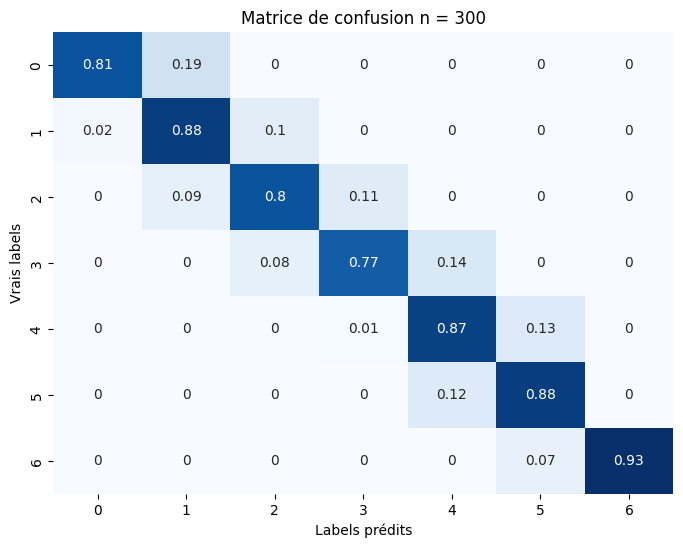

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n = 300")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Certaines classes sont sous représentées

grisearchCV

In [ ]:
"""
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 300, 200, 500], 'max_depth': [50, 70, 100, 200, 300]}
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs= -1)

grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Résultats
print('score données train', best_model.score(X_train_scaled, y_train))
print('score données test', best_model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n = 300")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

importances = best_model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparams = {\'n_estimators\': [50, 100, 300, 200, 500], \'max_depth\': [50, 70, 100, 200, 300]}\nmodel = RandomForestClassifier()\ngrid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring=\'accuracy\', n_jobs= -1)\n\ngrid_search.fit(X_train_scaled, y_train)\n\nprint(grid_search.best_params_)\n\nbest_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test_scaled)\n\n# Résultats\nprint(\'score données train\', best_model.score(X_train_scaled, y_train))\nprint(\'score données test\', best_model.score(X_test_scaled, y_test))\nprint(classification_report(y_test, y_pred))\n\ncnf_matrix = confusion_matrix(y_test, y_pred, normalize=\'true\').round(2)\n\nplt.figure(figsize=(8, 6))\nplt.title("Matrice de confusion n = 300")\nsns.heatmap(cnf_matrix, cmap=\'Blues\', annot=True, cbar=False)\nplt.ylabel(\'Vrais labels\')\nplt.xlabel(\'Labels prédits\')\nplt.show()\n\nimportances = best_model.feature_importances_

meilleurs paramètres : max_depth = 50 et n_estimator = 500

score données train 0.8939922573244754
score données test 0.872108583444848
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.83      0.86      0.85       249
           2       0.85      0.81      0.83       427
           3       0.79      0.77      0.78       324
           4       0.80      0.86      0.83      3333
           5       0.92      0.89      0.90      5968
           6       1.00      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.87      0.84      0.85     10462
weighted avg       0.87      0.87      0.87     10462



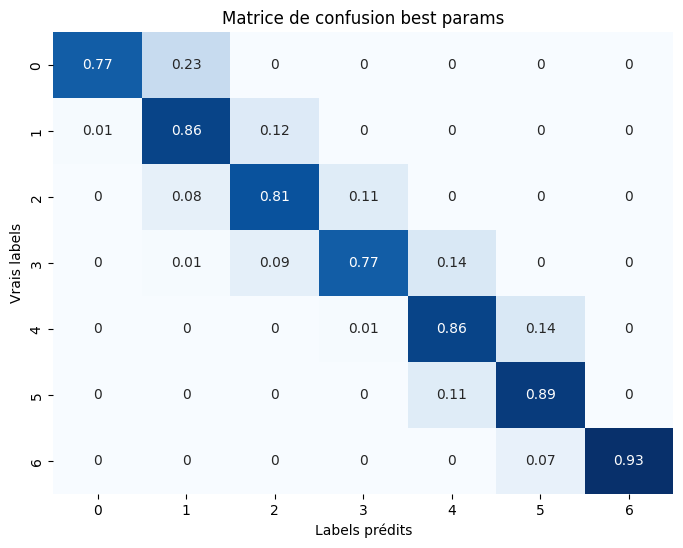

In [12]:
# Modele
model = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=42, n_jobs= -1)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion best params")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

## Deep learning

MLPClassifier

score données train 0.6197247048702385
score données test 0.6181418466832346
              precision    recall  f1-score   support

           0       0.30      0.55      0.39        31
           1       0.40      0.59      0.47       249
           2       0.31      0.69      0.43       427
           3       0.10      0.02      0.03       324
           4       0.54      0.91      0.67      3333
           5       0.97      0.50      0.66      5968
           6       0.03      0.06      0.04       130

    accuracy                           0.62     10462
   macro avg       0.38      0.47      0.38     10462
weighted avg       0.75      0.62      0.62     10462



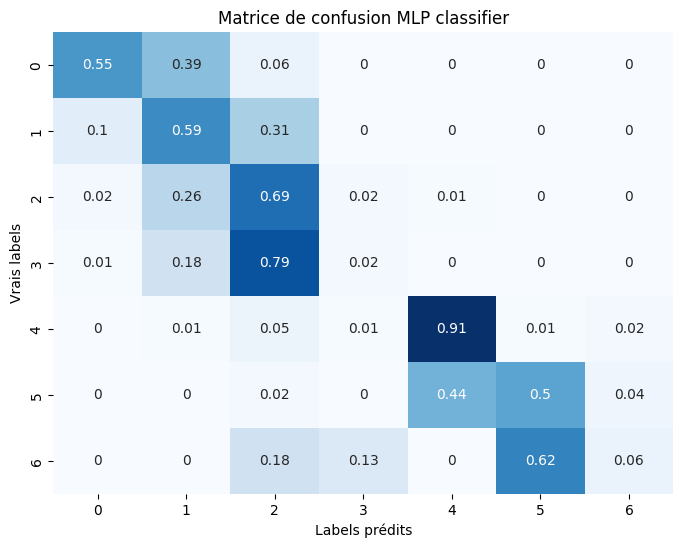

In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, alpha=0.001, solver='adam',early_stopping=True)
mlp.fit(X_train, y_train)

# Prédictions avec le modèle
y_pred = mlp.predict(X_test_scaled)

# Résultats
print('score données train', mlp.score(X_train_scaled, y_train))
print('score données test', mlp.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion MLP classifier")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

modèle sequentiel avec une couche cachée et le fonction d'activation relu

Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5855 - loss: 1.1274 - val_accuracy: 0.7520 - val_loss: 0.5226
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7597 - loss: 0.5065 - val_accuracy: 0.7711 - val_loss: 0.4780
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7721 - loss: 0.4702 - val_accuracy: 0.7792 - val_loss: 0.4621
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7763 - loss: 0.4534 - val_accuracy: 0.7760 - val_loss: 0.4524
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7809 - loss: 0.4412 - val_accuracy: 0.7846 - val_loss: 0.4455
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7848 - loss: 0.4324 - val_accuracy: 0.7828 - val_loss: 0.4370
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7856 - loss: 0.4259 - val_accuracy: 0.7772 - val_loss: 0.4338
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7922 - loss: 0.4164 - val_accuracy: 0.

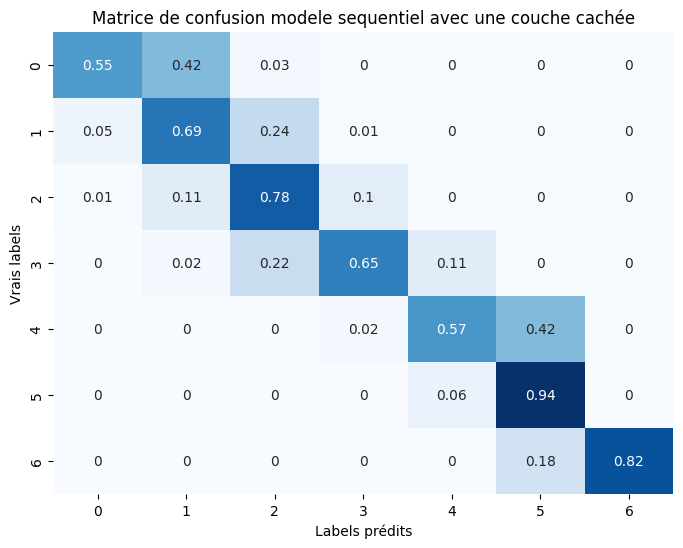

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches
model.add(Dense(units=64, activation="relu", input_shape=(num_features,)))
model.add(Dense(units=7, activation="softmax"))

# Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# Entraînement
model.fit(X_train_scaled, y_train,  # Données d'entraînement
          epochs=20,                 # Nombre d'epochs
          batch_size=128,            # Taille des batchs
          validation_split=0.2)      # 20% des données utilisées pour la validation



# Évaluation
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))

# Calculer la matrice de confusion

cnf_matrix = confusion_matrix(y_test, test_pred_class, normalize='true').round(2)


plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion modele sequentiel avec une couche cachée")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

modèle sequentiel avec plusieurs couches cachées et la fonction d'activation relu

Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7103 - loss: 0.8405 - val_accuracy: 0.7675 - val_loss: 0.4564
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7801 - loss: 0.4352 - val_accuracy: 0.7766 - val_loss: 0.4324
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7862 - loss: 0.4175 - val_accuracy: 0.7710 - val_loss: 0.4170
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7952 - loss: 0.3987 - val_accuracy: 0.7904 - val_loss: 0.4035
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7972 - loss: 0.3914 - val_accuracy: 0.7957 - val_loss: 0.3940
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7981 - loss: 0.3836 - val_accuracy: 0.7889 - val_loss: 0.3875
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8044 - loss: 0.3743 - val_accuracy: 0.7926 - val_loss: 0.3861
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8088 - loss: 0.3599 - val_accuracy: 

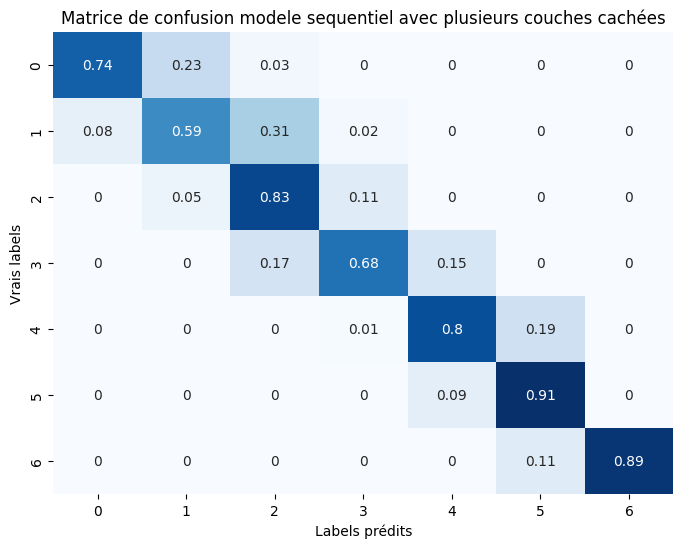

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches
model.add(Dense(units=256, activation="relu", input_shape=(num_features,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))

model.add(Dense(units=10, activation="softmax"))  # Couche de sortie

# Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# Entraînement
model.fit(X_train_scaled, y_train,  # Données d'entraînement
          epochs=20,                 # Nombre d'epochs
          batch_size=128,            # Taille des batchs
          validation_split=0.2)      # 20% des données utilisées pour la validation



# Évaluation
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))

# Calculer la matrice de confusion

cnf_matrix = confusion_matrix(y_test, test_pred_class, normalize='true').round(2)


plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion modele sequentiel avec plusieurs couches cachées")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

modèle sequentiel avec plusieurs couches cachées et la fonction d'activation leakyrelu

Epoch 1/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6873 - loss: 0.8368 - val_accuracy: 0.7820 - val_loss: 0.4477
Epoch 2/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7783 - loss: 0.4392 - val_accuracy: 0.7822 - val_loss: 0.4241
Epoch 3/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7866 - loss: 0.4119 - val_accuracy: 0.7907 - val_loss: 0.4107
Epoch 4/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7972 - loss: 0.3986 - val_accuracy: 0.7904 - val_loss: 0.4005
Epoch 5/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7956 - loss: 0.3907 - val_accuracy: 0.7910 - val_loss: 0.4091
Epoch 6/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7974 - loss: 0.3867 - val_accuracy: 0.7961 - val_loss: 0.3911
Epoch 7/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8035 - loss: 0.3762 - val_accuracy: 0.7971 - val_loss: 0.3800
Epoch 8/20
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8049 - loss: 0.3709 - val_accuracy: 0.

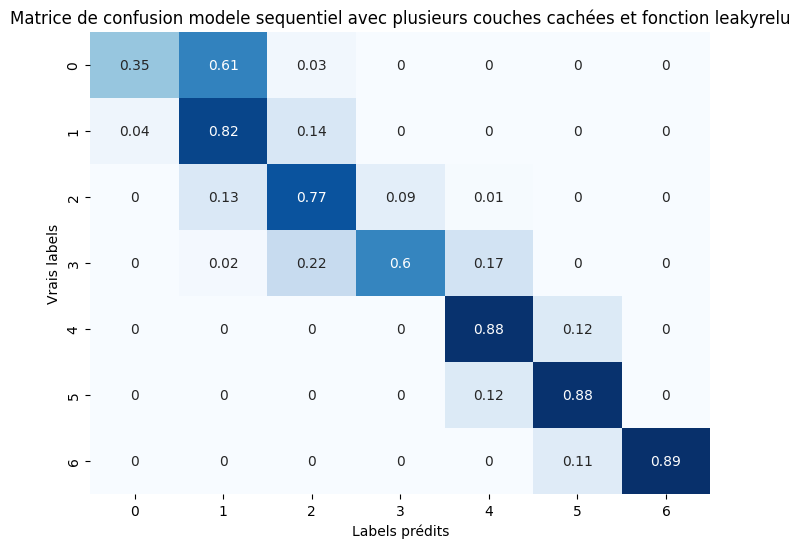

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LeakyReLU
import numpy as np

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches

model = Sequential()
model.add(Dense(256, input_shape=(num_features,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))


model.add(Dense(units=10, activation="softmax"))  # Couche de sortie

# Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# Entraînement
model.fit(X_train_scaled, y_train,  # Données d'entraînement
          epochs=20,                 # Nombre d'epochs
          batch_size=128,            # Taille des batchs
          validation_split=0.2)      # 20% des données utilisées pour la validation



# Évaluation
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))

# Calculer la matrice de confusion

cnf_matrix = confusion_matrix(y_test, test_pred_class, normalize='true').round(2)


plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion modele sequentiel avec plusieurs couches cachées et fonction leakyrelu")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

On testera plus le meme modele avec les 5 variables qui ont le plus d'importance

Random forest avec l'argument class_weight='balanced'

In [ ]:
# Modele avec l'argument class_weight='balanced'
model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n= 300, class_wieght balanced")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Random forest avec plus de branches : 500

In [ ]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion, n= 500")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Reechantillonage SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_smote, y_train_smote))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion, n =300 + smote")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Deep learning

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, alpha=0.001, solver='adam',early_stopping=True)
mlp.fit(X_train, y_train)

# Prédictions avec le modèle
y_pred = mlp.predict(X_test)

# Résultats
print('score données train', mlp.score(X_train_smote, y_train_smote))
print('score données test', mlp.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion MLP classifier")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Reechantillonage undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)


model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_resampled, y_train_resampled))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion = 300, undersampling")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Moins précis que le modele avec les données non rééchantillonées

In [ ]:
model = RandomForestClassifier(n_estimators=500, max_depth= 50, n_jobs=-1, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_resampled, y_train_resampled))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion = 300, undersampling")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Modele XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric="merror", use_label_encoder=False)

model.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_smote, y_train_smote))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion Xgbclassifier")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Selecion de variables

On teste le premier modèle avec les variables qui ont le plus d'importance

In [ ]:
df=pd.read_csv("Donnees_propres.csv")

X = df[['nox', 'masse_ordma_min', 'masse_ordma_max', 'nb_rapp', 'puiss_max']]

In [ ]:
# Variable cible etiquette
# On créé un dictionnaire qui contient les changements souhaités
grade = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# On remplace les notes alphabétiques par les notes numériques correspondantes
y= df['etiquette']
y = y.replace(grade)
display('etiquette', y.unique())

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données avec plus grand importance")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Selection des données purement caracteristiques de la voiture

In [ ]:
df=pd.read_csv("Donnees_propres.csv")
df_caract = df[['carburant','hybride','masse_ordma_min','masse_ordma_max',
                "puiss_max",'Carrosserie','typ_boite','nb_rapp', 'gamme']]


In [ ]:
# On remplace les notes alphabétiques par les notes numériques correspondantes
df_caract['hybride'] = df_caract['hybride'].replace({'oui':1, 'non': 0})

df_encoded = pd.get_dummies(df_caract, dtype='int')

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données caractéristiques uniquement")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [ ]:
importances = model.feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)

Avec les 5 caractéristiques les plus importantes

In [ ]:
df_caract = df[['masse_ordma_min','masse_ordma_max',"puiss_max",'typ_boite','nb_rapp']]

df_encoded = pd.get_dummies(df_caract, dtype='int')

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données caractéristiques les plus importantes")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()